Rename `hypervolume.npy` into `ct.npy` and `hypervolume_mask.npy` into `mask.npy`

In [ ]:
import os
path = '/Volumes/T7/Thesis/'
for folder in os.listdir(path):
    if folder == '.DS_Store':
        continue
    if os.path.exists(os.path.join(path, folder, 'hypervolume.npy')):
        os.rename(os.path.join(path, folder, 'hypervolume.npy'), os.path.join(path, folder, 'ct.npy'))
    if os.path.exists(os.path.join(path, folder, 'hypervolume_mask.npy')):
        os.rename(os.path.join(path, folder, 'hypervolume_mask.npy'), os.path.join(path, folder, 'mask.npy'))

Threshold for `P28B_ISC_FT_H_Exp2` should be 0.7, threshold for `VCT5_FT_N_Exp1` should be 1

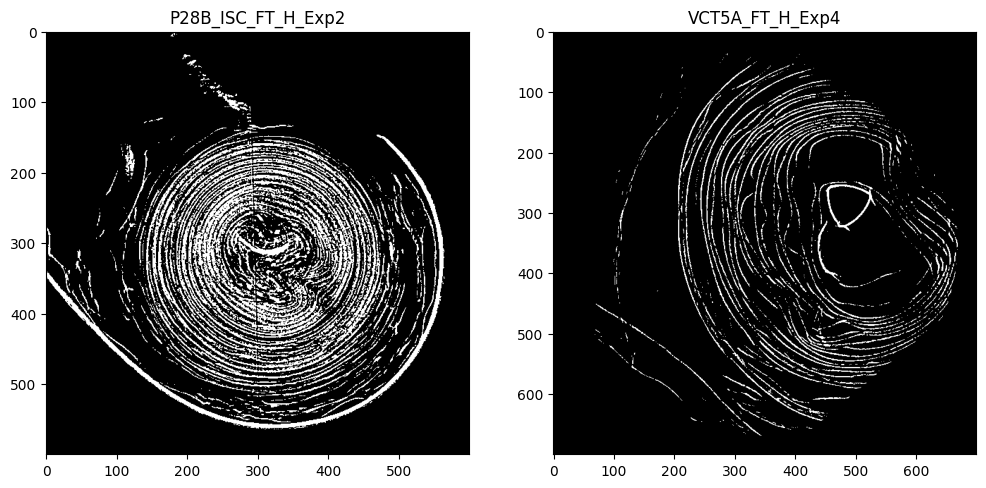

In [11]:
import fasttomo
# from skimage.io import imshow
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
data1 = fasttomo.Data('P28B_ISC_FT_H_Exp2')
ct1 = data1.ct
axs[0].imshow(ct1[20,20]>0.7, cmap='gray')
axs[0].set_title('P28B_ISC_FT_H_Exp2')
data2 = fasttomo.Data('VCT5A_FT_H_Exp4')
ct2 = data2.ct
axs[1].imshow(ct2[5,20]>0.8, cmap='gray')
_ = axs[1].set_title('VCT5A_FT_H_Exp4')

Merging and cropping the original files `volume_v2` obtained by Matilda's code

In [ ]:
import numpy as np
from numpy.lib.format import open_memmap  
from tqdm import tqdm
import os

exp = 'VCT5_FT_N_Exp1'
parent_path = f'/Volumes/T7/Thesis/{exp}'
folders = sorted(os.listdir(parent_path))
del folders[-1]
ct = open_memmap(os.path.join(parent_path, 'hypervolume.npy'), dtype=np.half, mode='w+', shape=(len(folders), 260, 700, 700))
progress_bar = tqdm(total=len(folders), desc='Copying volumes')
for t, folder in enumerate(folders):
    temp = open_memmap(os.path.join(parent_path, folder, 'volume_v2.npy'), mode='r')
    ct[t] = temp[15:275, 108:808, 144:844]
    progress_bar.update()
progress_bar.close()

Convert `.stl` mesh into `.obj`

In [7]:
from stl_to_obj import stl_to_obj
import os

exp = 'P28B_ISC_FT_H_Exp2'
parent_path = f'/Volumes/T7/Thesis/{exp}/sidewall_stls'
stl_to_obj.stl_to_obj(os.path.join(parent_path, '000', '00000.stl'), os.path.join(parent_path, '000', '00000.obj'))